In [5]:
import sys
import torch

import os
import matplotlib.pyplot as plt
import numpy as np
from mobile_sam import sam_model_registry, SamPredictor

sam_checkpoint = "C:/Users/gbo10/OneDrive/measurement_paper_images/sam_experiments/mobile_sam.pt"
model_type = "vit_t"

device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
sam.eval()

predictor = SamPredictor(sam)

c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if thi

In [6]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [27]:
from ultralytics import RTDETR

# Load a pretrained YOLOv8n model
model = RTDETR("C:/Users/gbo10/OneDrive/measurement_paper_images/sam_experiments/right_round_best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("C:/Users/gbo10/OneDrive/measurement_paper_images/to colab/test with seperation/images/right round/GX010068_26_666-jpg_gamma_jpg.rf.d9631e54ca955ee3b93f9ad9bf8b3c5d.jpg", save=True,save_txt=True, imgsz=640, conf=0.7)


image 1/1 C:\Users\gbo10\OneDrive\measurement_paper_images\to colab\test with seperation\images\right round\GX010068_26_666-jpg_gamma_jpg.rf.d9631e54ca955ee3b93f9ad9bf8b3c5d.jpg: 640x640 3 prawns, 879.2ms
Speed: 6.7ms preprocess, 879.2ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\predict2
1 label saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\predict2\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'prawn'}
 obb: None
 orig_img: array([[[130,  91, 153],
         [123,  86, 132],
         [118,  84,  95],
         ...,
         [146, 137,  99],
         [140, 132,  95],
         [136, 128,  91]],
 
        [[129,  90, 152],
         [123,  87, 131],
         [117,  83,  94],
         ...,
         [145, 136,  98],
         [139, 131,  94],
         [133, 125,  88]],
 
        [[130,  89, 150],
         [124,  85, 130],
         [118,  82,  94],
         ...,
         [144, 138,  97],
         [138, 131,  92],
         [131, 124,  85]],
 
        ...,
 
        [[ 54,  29,  49],
         [ 50,  28,  47],
         [ 48,  25,  47],
         ...,
         [ 85,  75,  57],
         [ 84,  74,  57],
         [ 84,  74,  56]],
 
        [[ 54,  26,  49],
         [ 52,  26,  50],
         [ 52,  26,  50],
         ...,
         [ 82,  75,

In [28]:
import numpy as np

def yolo_to_box(yolo_line, img_width, img_height):
    # YOLO format: class x_center y_center width height (normalized)
    yolo_data = yolo_line.strip().split()
    x_center, y_center, width, height = map(float, yolo_data[1:])

    # Convert to pixel coordinates
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    return np.array([x_min, y_min, x_max, y_max])

def convert_yolo_to_boxes(yolo_file, img_width, img_height):
    boxes = []
    with open(yolo_file, 'r') as file:
        for line in file:
            box = yolo_to_box(line, img_width, img_height)
            boxes.append(box)
    return boxes

# Example usage
yolo_file = 'C:/Users/gbo10/Videos/data-science/Research-counting-algorithms/runs/detect/predict2/labels/GX010068_26_666-jpg_gamma_jpg.rf.d9631e54ca955ee3b93f9ad9bf8b3c5d.txt'
img_width = 640  # Image width
img_height = 640  # Image height

boxes = convert_yolo_to_boxes(yolo_file, img_width, img_height)
for box in boxes:
    print(f"input_box = np.array({box})")




input_box = np.array([146 433 238 587])
input_box = np.array([311 343 377 520])
input_box = np.array([363 507 464 603])


In [30]:
import cv2

image = cv2.imread('C:/Users/gbo10/OneDrive/measurement_paper_images/to colab/test with seperation/images/right round/GX010068_26_666-jpg_gamma_jpg.rf.d9631e54ca955ee3b93f9ad9bf8b3c5d.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


predictor.set_image(image)

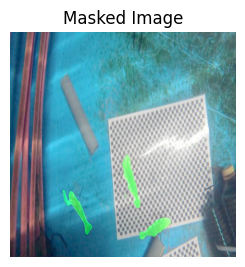

In [31]:
masks=[]

for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)

for mask in masks:
    # Combine all three channels into one mask
    single_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    # Create a colored mask for visualization
    color_mask = np.zeros_like(image)
    color_mask[single_mask == 255] = [0, 255, 0]  # Green color
    # Combine the colored mask with the image
    image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)
#show the masks on the same image


# Display the original and masked images

plt.subplot(1, 2, 2)
plt.title('Masked Image')
plt.imshow(image)
plt.axis('off')

plt.show()

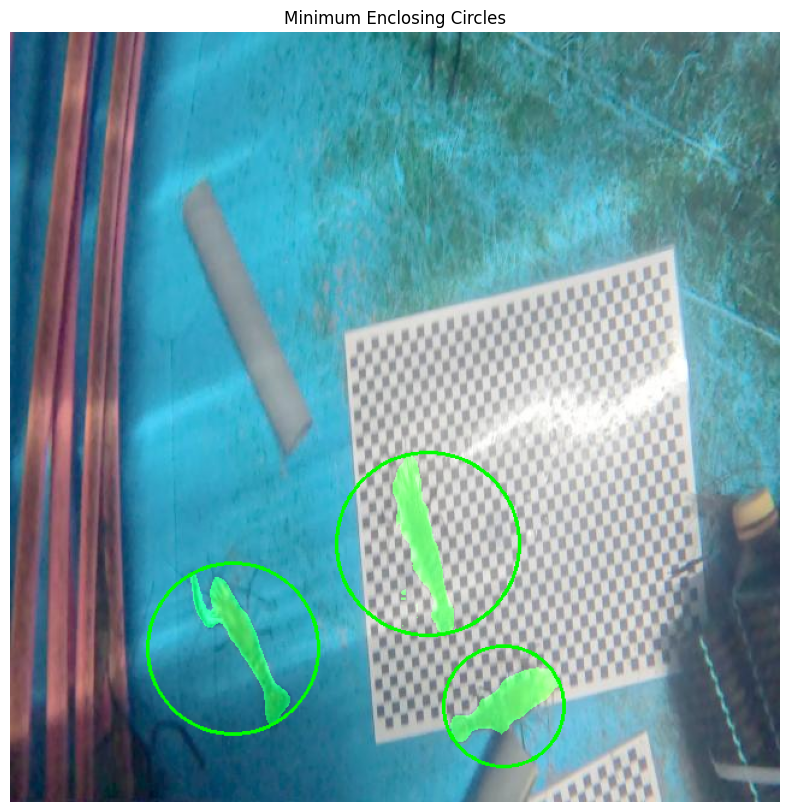

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Assuming you have multiple masks as a list of 3D numpy arrays (3, height, width)
def get_main_body_mask(mask):
    # Combine all three channels into one mask
    combined_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    return combined_mask

# Function to filter out the claw based on heuristic
def filter_out_claw(contours):
    # Assuming the largest contour is the body without the claw
    main_body_contour = max(contours, key=cv2.contourArea)
    return main_body_contour

# Load the masks
# Replace with your mask generation logic
for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)


# Create a copy of the original image to draw masks on

# Process each mask individually
for mask in masks:
    # Get the main body mask
    main_body_mask = get_main_body_mask(mask)

    # Find contours in the main body mask
    contours, _ = cv2.findContours(main_body_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out the claw
    main_body_contour = filter_out_claw(contours)

    # Convert contour points to list of Point objects
    points = [Point(p[0][0], p[0][1]) for p in main_body_contour]

    # Apply Welzl's algorithm to find the minimum enclosing circle
    mec = welzl(points)

    # Draw the circle on the original image
    center = (int(mec.C.X), int(mec.C.Y))
    radius = int(mec.R)
    cv2.circle(image, center, radius, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Minimum Enclosing Circles')
plt.axis('off')
plt.show()


(array([[[437, 528]],

       [[436, 529]],

       [[431, 529]],

       [[430, 530]],

       [[427, 530]],

       [[426, 531]],

       [[425, 531]],

       [[424, 532]],

       [[423, 532]],

       [[422, 533]],

       [[420, 533]],

       [[419, 534]],

       [[418, 534]],

       [[417, 535]],

       [[415, 535]],

       [[413, 537]],

       [[412, 537]],

       [[408, 541]],

       [[408, 542]],

       [[407, 543]],

       [[407, 544]],

       [[402, 549]],

       [[401, 549]],

       [[399, 551]],

       [[398, 551]],

       [[396, 553]],

       [[395, 553]],

       [[394, 554]],

       [[392, 554]],

       [[391, 555]],

       [[391, 556]],

       [[390, 557]],

       [[390, 559]],

       [[388, 561]],

       [[388, 562]],

       [[383, 567]],

       [[382, 567]],

       [[381, 568]],

       [[370, 568]],

       [[369, 569]],

       [[368, 569]],

       [[368, 570]],

       [[367, 571]],

       [[367, 573]],

       [[366, 574]],

       [[

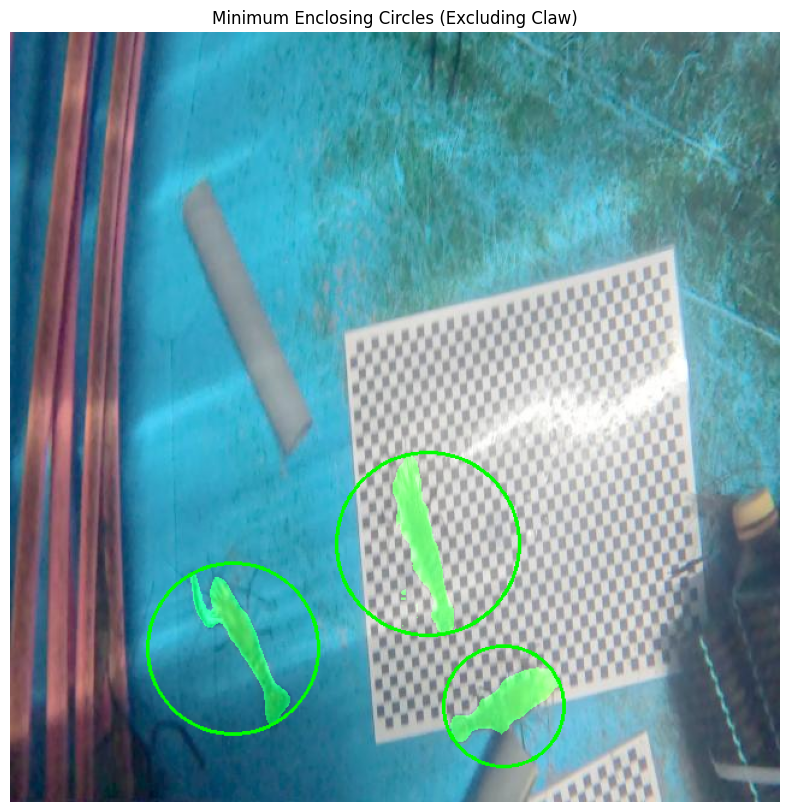

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Function to extract main body excluding the claw based on heuristic
def extract_main_body(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return None
    print(contours[0])
    # Assuming the largest contour is the body including the claw
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create a mask for the largest contour
    mask_largest_contour = np.zeros_like(mask)
    cv2.drawContours(mask_largest_contour, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the convex hull of the largest contour
    hull = cv2.convexHull(largest_contour)
    
    # Create a mask for the convex hull
    mask_hull = np.zeros_like(mask)
    cv2.drawContours(mask_hull, [hull], -1, 255, thickness=cv2.FILLED)

    # Subtract the convex hull mask from the largest contour mask to get the claw
    mask_claw = cv2.subtract(mask_largest_contour, mask_hull)
    
    # Find the contour of the claw
    contours_claw, _ = cv2.findContours(mask_claw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours_claw) == 0:
        return largest_contour  # No claw detected
    
    # Assume the claw is the largest defect from the convex hull
    claw_contour = max(contours_claw, key=cv2.contourArea)
    
    # Create a mask for the claw
    mask_claw_only = np.zeros_like(mask)
    cv2.drawContours(mask_claw_only, [claw_contour], -1, 255, thickness=cv2.FILLED)
    
    # Subtract the claw mask from the largest contour mask to get the main body
    mask_main_body = cv2.subtract(mask_largest_contour, mask_claw_only)
    
    # Find contours of the main body again
    contours_main_body, _ = cv2.findContours(mask_main_body, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours_main_body) == 0:
        return None

    # Return the largest contour which should be the main body without the claw
    return max(contours_main_body, key=cv2.contourArea)

# Load the image and the corresponding masks
masks = [mask]  # Use the mask from your previous code

# Process each mask individually
for mask in masks:
    # Convert the mask to a single channel
    single_channel_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    
    # Extract the main body contour
    main_body_contour = extract_main_body(single_channel_mask)
    
    if main_body_contour is not None:
        # Convert contour points to list of Point objects
        points = [Point(p[0][0], p[0][1]) for p in main_body_contour]
        
        # Apply Welzl's algorithm to find the minimum enclosing circle
        mec = welzl(points)
        
        # Draw the circle on the original image
        center = (int(mec.C.X), int(mec.C.Y))
        radius = int(mec.R)
        cv2.circle(image, center, radius, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Minimum Enclosing Circles (Excluding Claw)')
plt.axis('off')
plt.show()
